# Exploração e Análise do dataset

Importando biblioteca


In [1]:
import pandas as pd

Lendo base de dados


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

Método head mostra 5 primeiras linhas

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Obtendo informações sobre o dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


método describe gera estatisticas descritivas do dataframe

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
linhas, colunas = df.shape
print(f'O dataset possui {linhas} linhas e {colunas} colunas.')

O dataset possui 133349 linhas e 11 colunas.


In [7]:
df.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Alterando nome das colunas

In [8]:
df.columns = ['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa']
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [9]:
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

Entendendo variaveis categoricas, utilizando método value_counts

In [10]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [13]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


Renomeando valores do dataframe para portugues

In [14]:
contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance',
    'CT': 'Contrato'
}

df['contrato'] = df['contrato'].replace(contrato)

display(df['contrato'].value_counts())

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelance,16


In [15]:
tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Media',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

display(df['tamanho_empresa'].value_counts())


,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [16]:
remoto = {
    0: 'Presencial',
    50: 'Hibrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto)

display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [17]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


Método describe mostrando estatisticas das colunas categoricas

In [18]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,SE,Tempo Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Iniciando limpeza de dados

In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [20]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [21]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [22]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,SE,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,MI,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,EN,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,SE,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,SE,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,SE,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,SE,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,EN,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,MI,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,MI,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


*Exemplo ficticio para entender cenários de substituimos valores nulos*

In [23]:
import numpy as np
#criando um dataframe de teste
df_salarios = pd.DataFrame ({
    'nome': ["Ana","Bruno","carlos", "daniel", "val"],
    'salario':[4000, np.nan,5000, np.nan, 100000]})
display(df_salarios)
#calcula média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
#calcula a mediana salarial e subtitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
display(df_salarios)

,nome,salario
0,Ana,4000.0
1,Bruno,NaN
2,carlos,5000.0
3,daniel,NaN
4,val,100000.0


,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,carlos,5000.0,5000.00,5000.0
3,daniel,NaN,36333.33,5000.0
4,val,100000.0,100000.00,100000.0


In [24]:
df_temperatura = pd.DataFrame({
    "dia": ["segunda", "terça", "quarta", "quinta", "sexta"],
    "temperatura":[30, np.nan, np.nan, 28, 29]
})
#método ffill preenche os valores nulos com o valor anterior
df_temperatura["preenchido_ffil"]= df_temperatura["temperatura"].ffill()
#método bfill preenche os valores nulos com o valor da frente
df_temperatura["preenchido_bfil"]= df_temperatura["temperatura"].bfill()

df_temperatura

,dia,temperatura,preenchido_ffil,preenchido_bfil
0,segunda,30.0,30.0,30.0
1,terça,NaN,30.0,28.0
2,quarta,NaN,30.0,28.0
3,quinta,28.0,28.0,28.0
4,sexta,29.0,29.0,29.0


In [25]:
df_cidades = pd.DataFrame({
     'nome': ["Ana","Bruno","carlos", "daniel", "val"],
     'cidade':["São paulo", np.nan, "curitiba", np.nan, "belem"]
})
# Outra forma de preencher valores nulos é com valores fixo
df_cidades["cidades_preenchidas"] = df_cidades["cidade"].fillna("Não informado")
df_cidades


,nome,cidade,cidades_preenchidas
0,Ana,São paulo,São paulo
1,Bruno,NaN,Não informado
2,carlos,curitiba,curitiba
3,daniel,NaN,Não informado
4,val,belem,belem


Para analise da base de salário decidimos exluir os 10 valores que haviam na base

In [26]:
#apagando os valores nulos
df_limpo = df.dropna()
display(df_limpo)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,SE,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021.0,MI,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020.0,EN,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020.0,EN,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


In [27]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [28]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [29]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [30]:
# mudando o tipo do campo ano que antes era float e passa a ser int, removendo a casa decimal que tinha antes
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('int64'))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


# Iniciando análise e criação de gráficos

In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

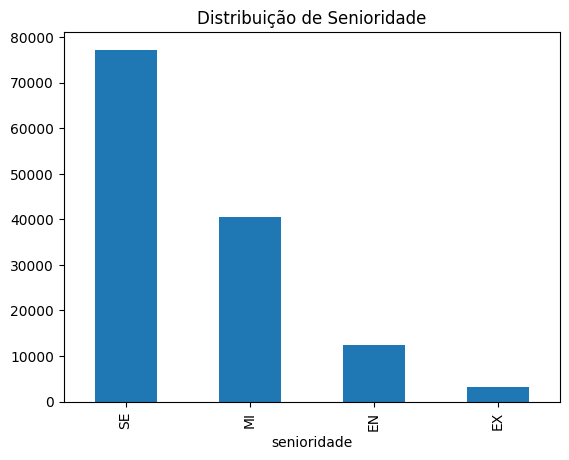

In [32]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [33]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

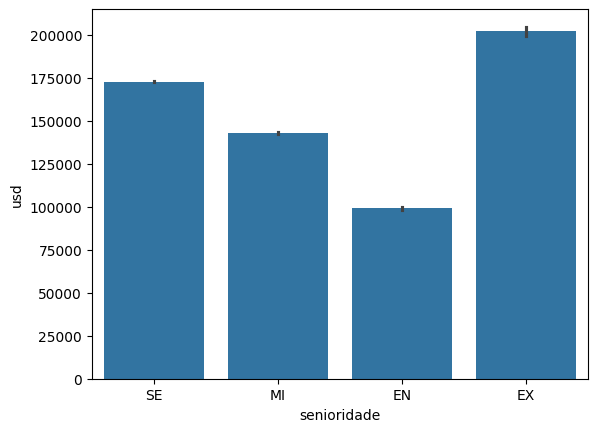

In [34]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [35]:
import matplotlib.pyplot as plt

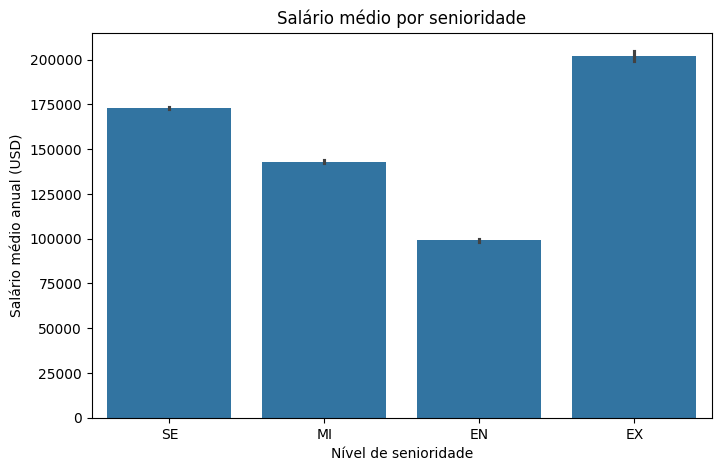

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Nível de senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [37]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [38]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='senioridade')

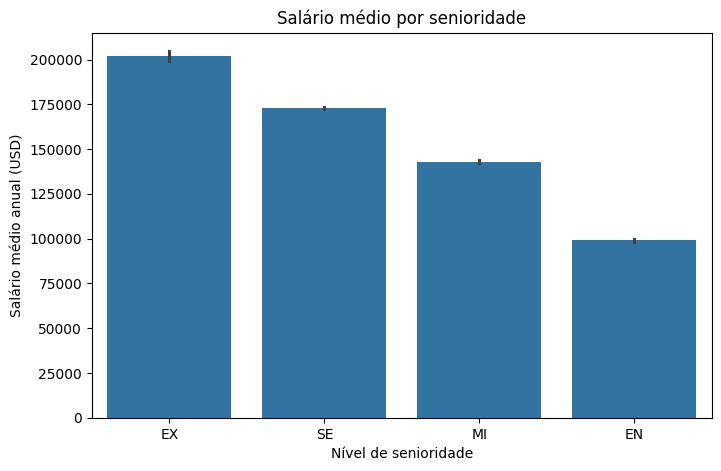

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd',order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Nível de senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

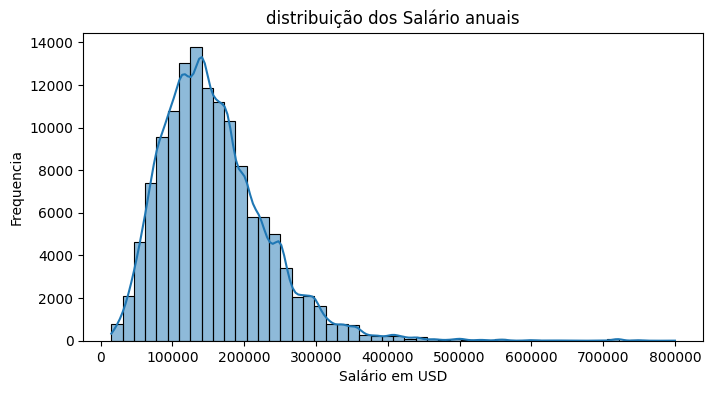

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("distribuição dos Salário anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequencia")
plt.show()

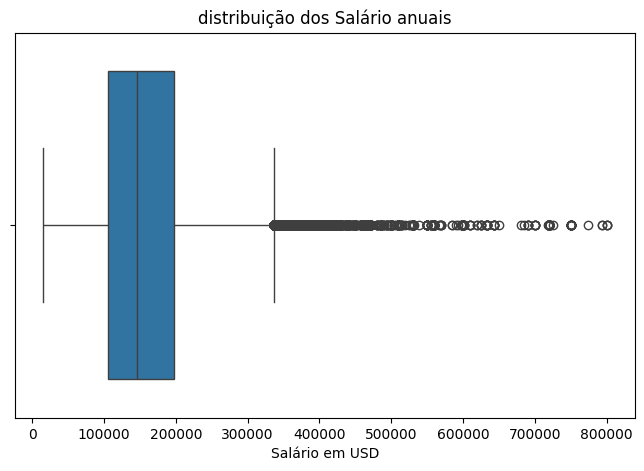

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("distribuição dos Salário anuais")
plt.xlabel("Salário em USD")
plt.show()

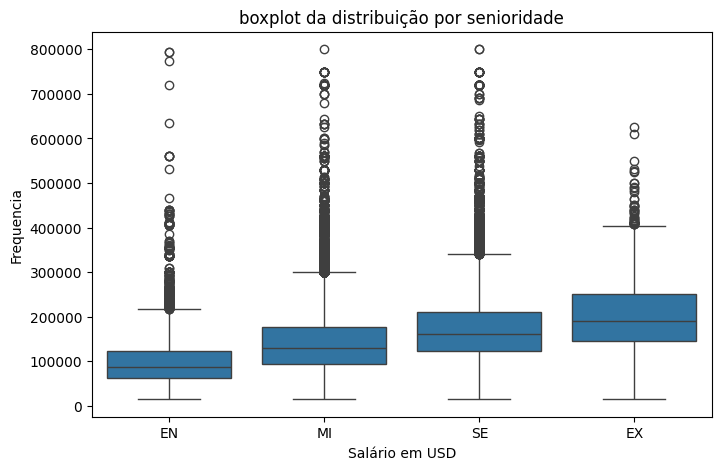

In [42]:
ordem_senioridade = ['EN','MI','SE','EX']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd',data=df_limpo, order=ordem_senioridade )
plt.title("boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.ylabel("Frequencia")
plt.show()

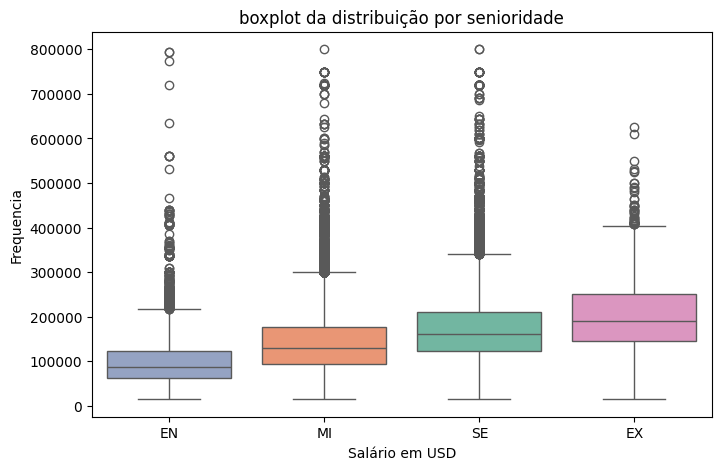

In [43]:
ordem_senioridade = ['EN','MI','SE','EX']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd',data=df_limpo, order=ordem_senioridade,palette='Set2',hue='senioridade' )
plt.title("boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.ylabel("Frequencia")
plt.show()

In [44]:
import plotly.express as px

df_senioridade_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(df_senioridade_salario, x='senioridade', y='usd', title='Média Salarial por Senioridade')
fig.update_layout(xaxis_title='Nível de Senioridade', yaxis_title='Média Salarial Anual (USD)')
fig.show()

In [45]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values = 'quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
             )
fig.update_traces(textinfo='percent+label')
fig.show()



In [46]:
pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.8 MB/s eta 0:00:00


In [47]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [48]:
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,USA
1,2025,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,USA
2,2025,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,AUS
3,2025,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,AUS
4,2025,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,USA


In [49]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)